In [2]:
from preamble import *
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mglearn
from matplotlib import font_manager, rc
plt.rc('font', family='Malgun Gothic')
from sklearn.model_selection import train_test_split


In [3]:
X,y = mglearn.datasets.make_wave(n_samples=40)

# 데이터셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

# 이웃 수를 3으로 하여 객체 생성
reg = KNeighborsRegressor(n_neighbors=3)

# 훈련 데이터와 타겟을 사용하여 모델을 학습
reg.fit(X_train, y_train)

# 테스트 세트 예측
print(format(reg.predict(X_test)))

# 테스트 세트 R^2
print(format(reg.score(X_test,y_test)))

# test Size를 바꿈
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size = 0.4)


# 테스트 세트 예측
print(format(reg.predict(X_test)))

# 테스트 세트 R^2(바뀜)
print(format(reg.score(X_test,y_test)))

NameError: name 'KNeighborsRegressor' is not defined

X_triam,shape : {} (24, 1) X_test,shape : {} (16, 1)
X_triam,shape : {} (24, 1) X_test,shape : {} (16, 1)
X_triam,shape : {} (24, 1) X_test,shape : {} (16, 1)


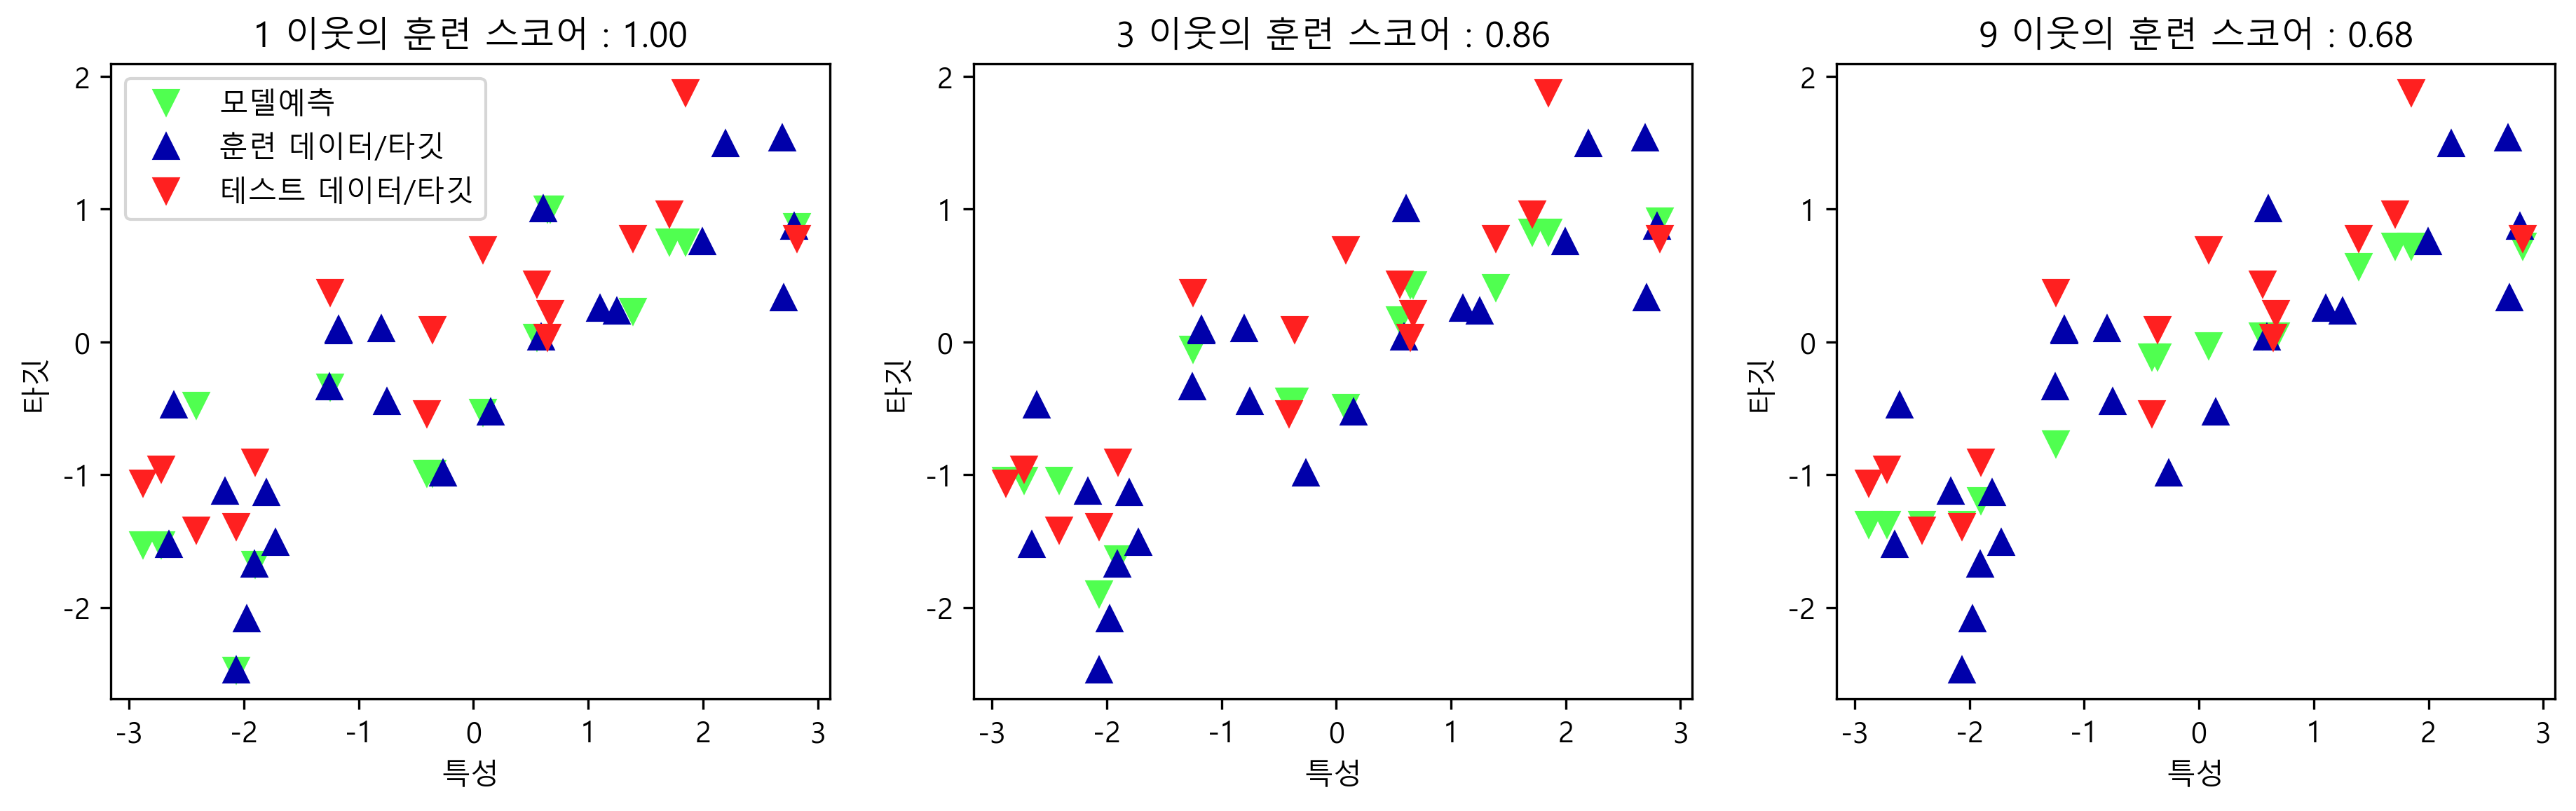

In [89]:
fig, axes = plt.subplots(1,3,figsize = (15,4))

for neighbors, ax in zip([1,3,9],axes):
    # 1,3,9 일때 예측
    reg = KNeighborsRegressor(n_neighbors=neighbors)
    print("X_triam,shape : {}",format(X_train.shape), "X_test,shape : {}", format(X_test.shape))
    reg.fit(X_train,y_train)
    ax.plot(X_test, reg.predict(X_test),'v', c= mglearn.cm3(2),markersize=8)
    ax.plot(X_train,y_train,'^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test,y_test,'v',c=mglearn.cm2(1),markersize=8)

    ax.set_title("{} 이웃의 훈련 스코어 : {:.2f}".format(neighbors,reg.score(X_train,y_train), reg.score(X_test,y_test)))
    # x,y이름 세팅
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")

60개 훈련 세트 : 0.67
60개 테스트 세트 점수 : 0.66
coef_ :  [0.394]
intercept_: -0.031804343026759746
100개 훈련 세트 : 0.59
100개 테스트 세트 점수 : 0.66
500개 훈련 세트 : 0.68
500개 테스트 세트 점수 : 0.57


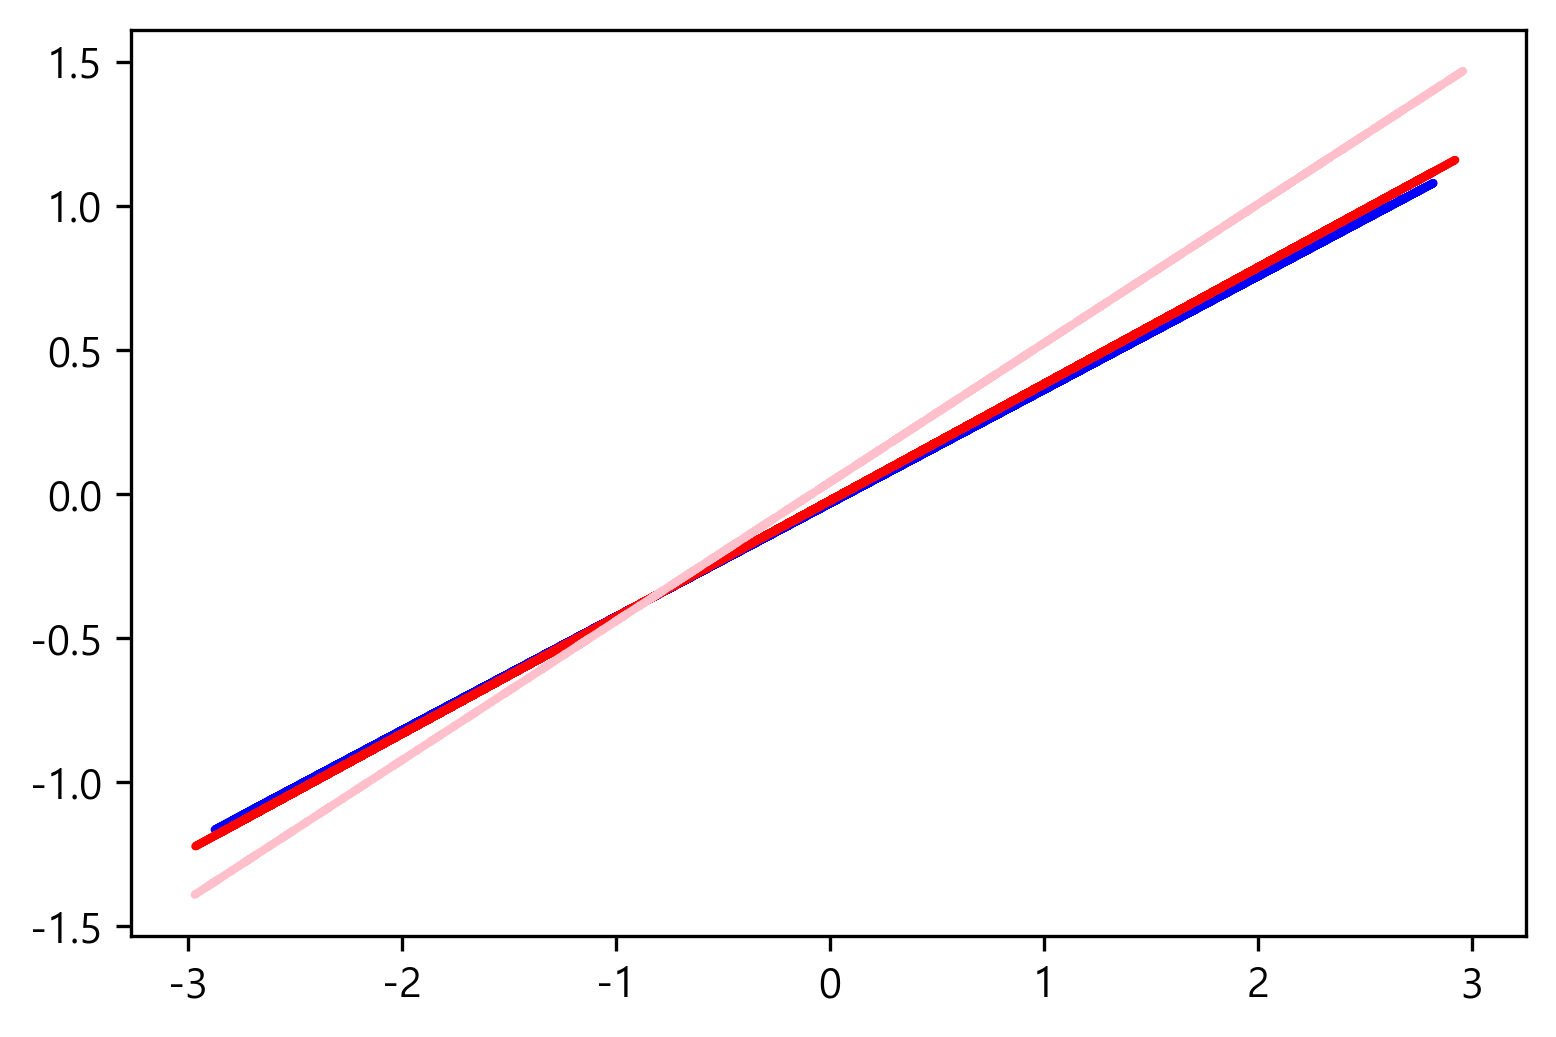

In [122]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

lr = LinearRegression().fit(X_train,y_train)

print("60개 훈련 세트 : {:.2f}".format(lr.score(X_train,y_train)))
print("60개 테스트 세트 점수 : {:.2f}".format(lr.score(X_test,y_test)))

# 기울기와 절편 제공 coef_ : 기울기, intercept_: 절편
print("coef_ : ",lr.coef_)
print("intercept_:", lr.intercept_)

# 점이 너무 많이 나와서 점은 표기를 하지 않음.
# plt.plot(X,y,'o')

predict = lr.predict(X)
plt.plot(X, predict, color='blue')
# 60 개와 구별을 위해 100 개짜리는 핑크로 해봄

X, y = mglearn.datasets.make_wave(n_samples=100)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

lr = LinearRegression().fit(X_train,y_train)
predict = lr.predict(X)

print("100개 훈련 세트 : {:.2f}".format(lr.score(X_train,y_train)))
print("100개 테스트 세트 점수 : {:.2f}".format(lr.score(X_test,y_test)))
plt.plot(X, predict, color='red')

# 500개 짜리는 핑크로 해봄
X, y = mglearn.datasets.make_wave(n_samples=500)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

lr = LinearRegression().fit(X_train,y_train)
predict = lr.predict(X)

print("500개 훈련 세트 : {:.2f}".format(lr.score(X_train,y_train)))
print("500개 테스트 세트 점수 : {:.2f}".format(lr.score(X_test,y_test)))
plt.plot(X, predict, color='pink')

Linear
훈련 세트 점수: 0.68
테스트 세트 점수: 0.57
w[0] :  [0.482]  b:  0.04154708498957077
KNN
훈련 세트 점수: 0.85
테스트 세트 점수: 0.57


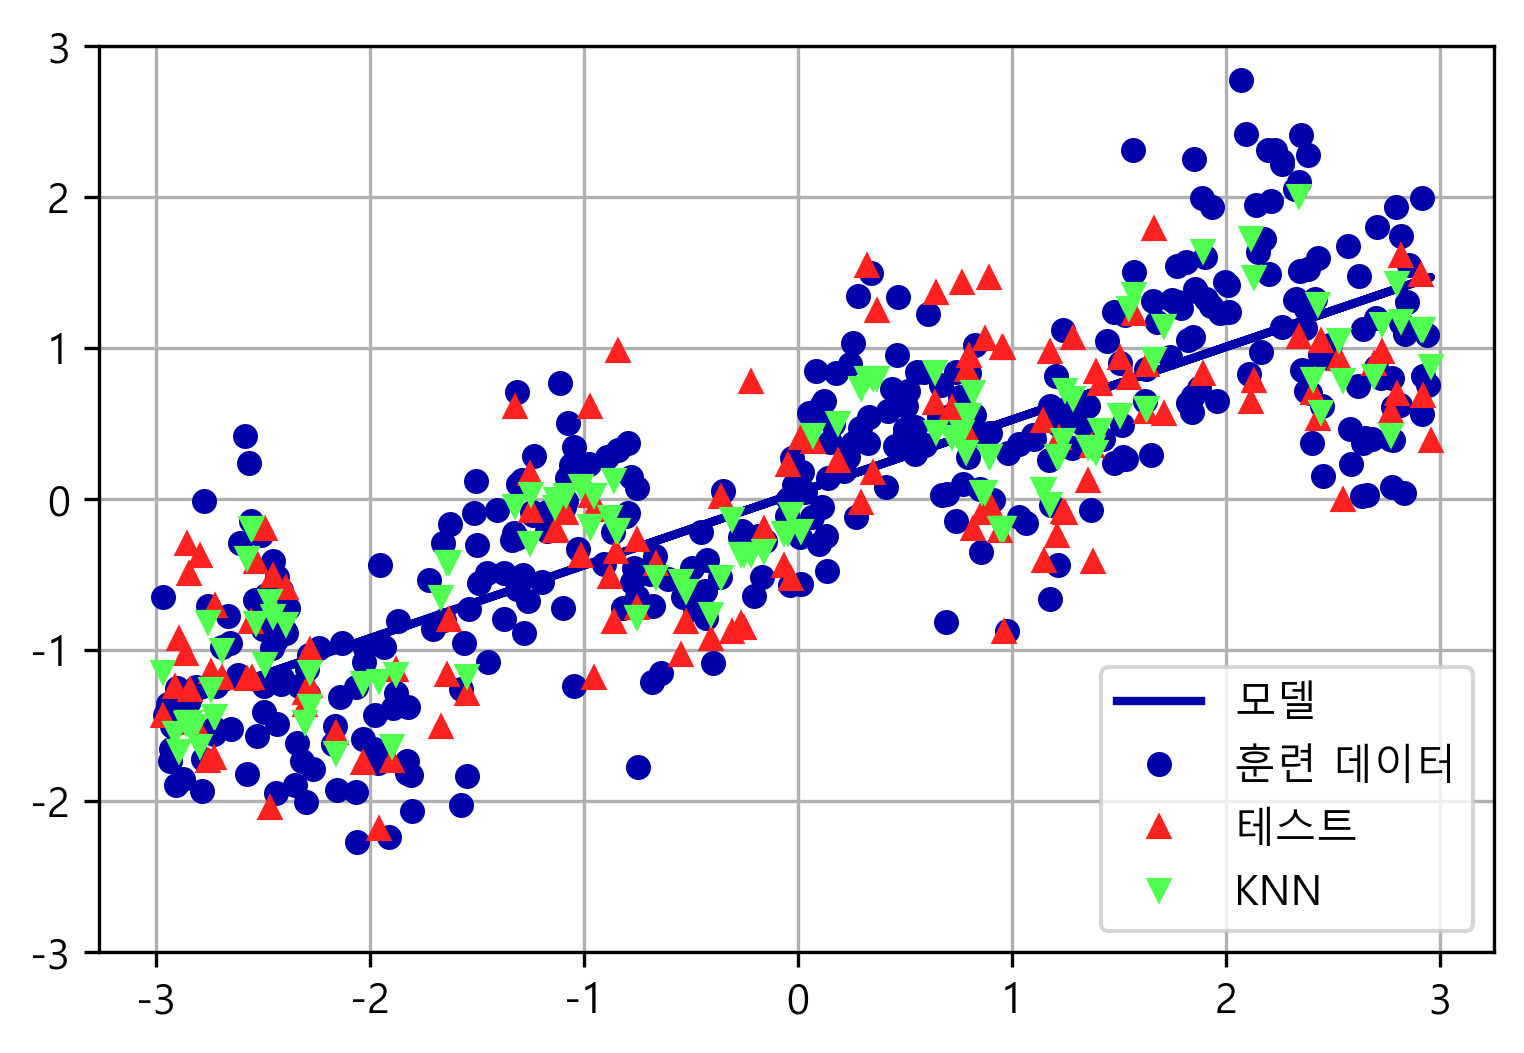

In [126]:
# knn과 선형의 비교

X,y = mglearn.datasets.make_wave(n_samples = 500)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
lr = LinearRegression().fit(X_train, y_train) 

knn = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)


print("Linear")
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))
print("w[0] : ", lr.coef_, " b: ", lr.intercept_)

print("KNN")
print("훈련 세트 점수: {:.2f}".format(knn.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(knn.score(X_test, y_test)))

plt.plot(X, lr.predict(X), c=mglearn.cm3(0))
plt.plot(X_train, y_train, 'o', markersize=5, c=mglearn.cm3(0))
plt.plot(X_test, y_test, '^', markersize=5,  c=mglearn.cm3(1))
plt.plot(X_test, knn.predict(X_test), 'v',markersize=5,  c=mglearn.cm3(2))

plt.ylim(-3,3)

plt.grid()
plt.legend(["모델", "훈련 데이터", "테스트", "KNN"], loc=4)

In [129]:
from sklearn.datasets import load_boston

boston = load_boston()
print("boston.keys():\n", boston.keys())
print("data의 크기 : ", boston.data.shape)
print("특성 이름:\n{}\n" , boston.feature_names)
print(boston['DESCR'] + "\n...")

df = pd.DataFrame(boston.data, columns=boston.feature_names)
print(df.head())

boston.keys():
 dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
data의 크기 :  (506, 13)
특성 이름:
{}
 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - 

(506,)
(1, 506)
(506, 1)
[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]]
w[0]: 9.102109  b: -34.670621


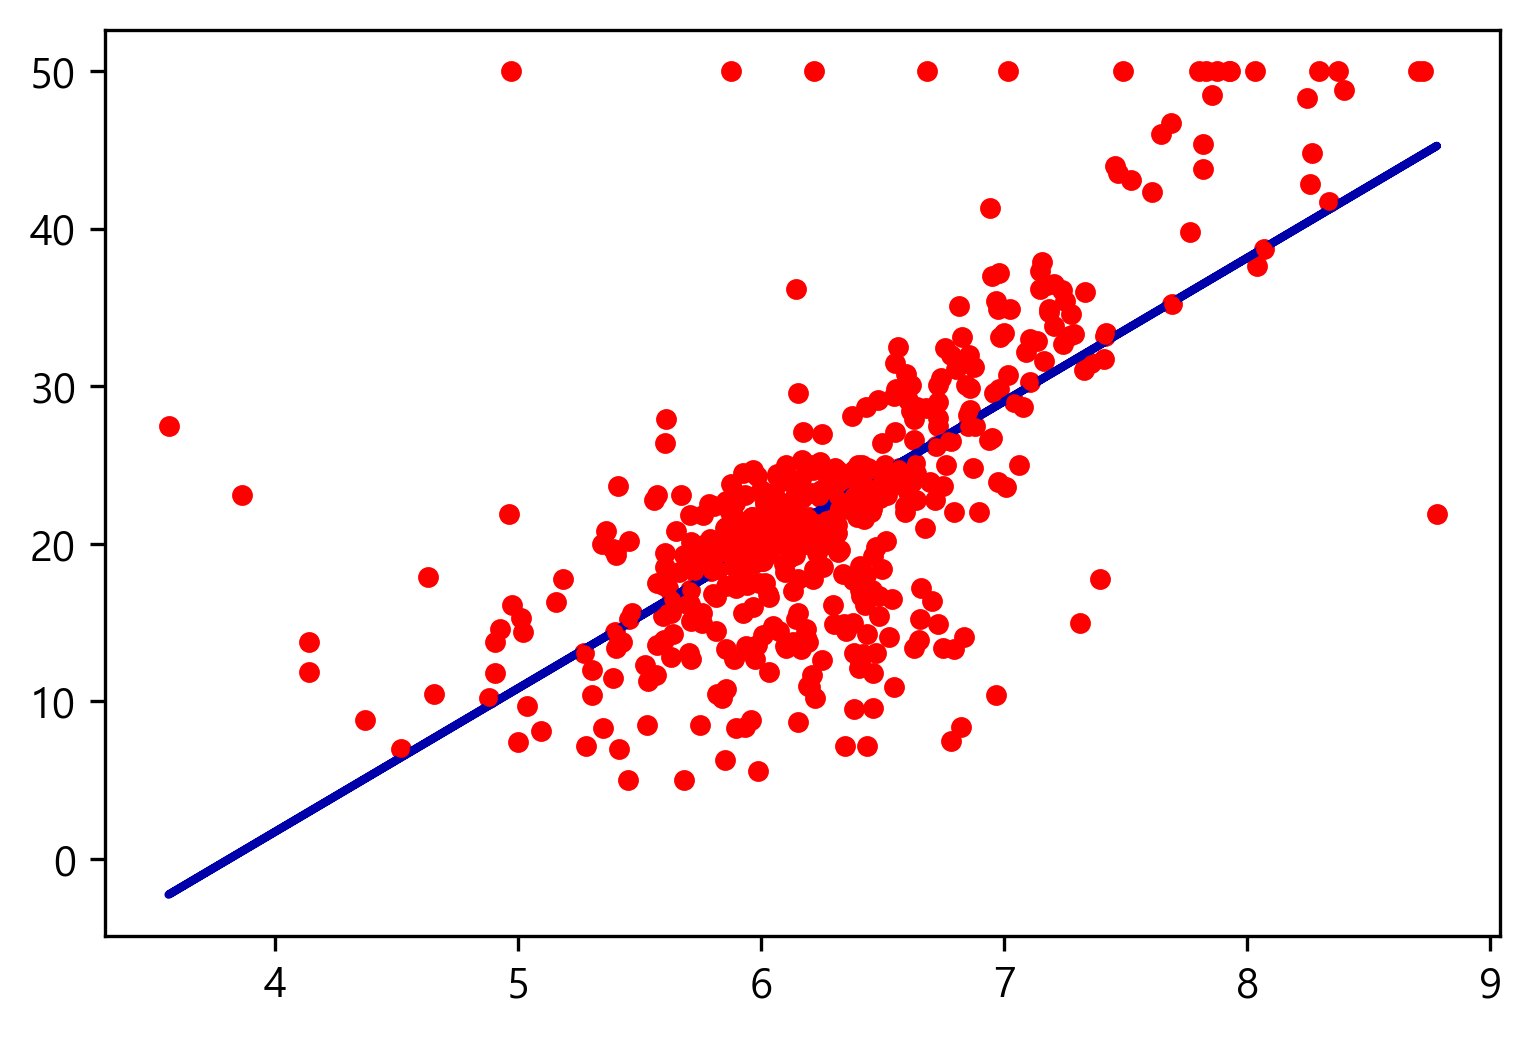

In [133]:
plt.plot(boston.data[:,5], boston.target, 'o', color='r', markersize=4)
X= boston.data[:,5]
print(X.shape)

X_1 = np.atleast_2d(X)
print(X_1.shape)
X_2 = np.transpose(X_1)

print(X_2.shape)
print(X_2[:5])
y= boston.target 

lr.fit(X_2, y)
y_predicted = lr.predict(X_2)

print("w[0]: %f  b: %f" % (lr.coef_, lr.intercept_))
plt.plot(X_2,y_predicted)
plt.plot(X_2,y,'o',color='r',markersize=3)

No handles with labels found to put in legend.
X_train.shape:(379, 13)


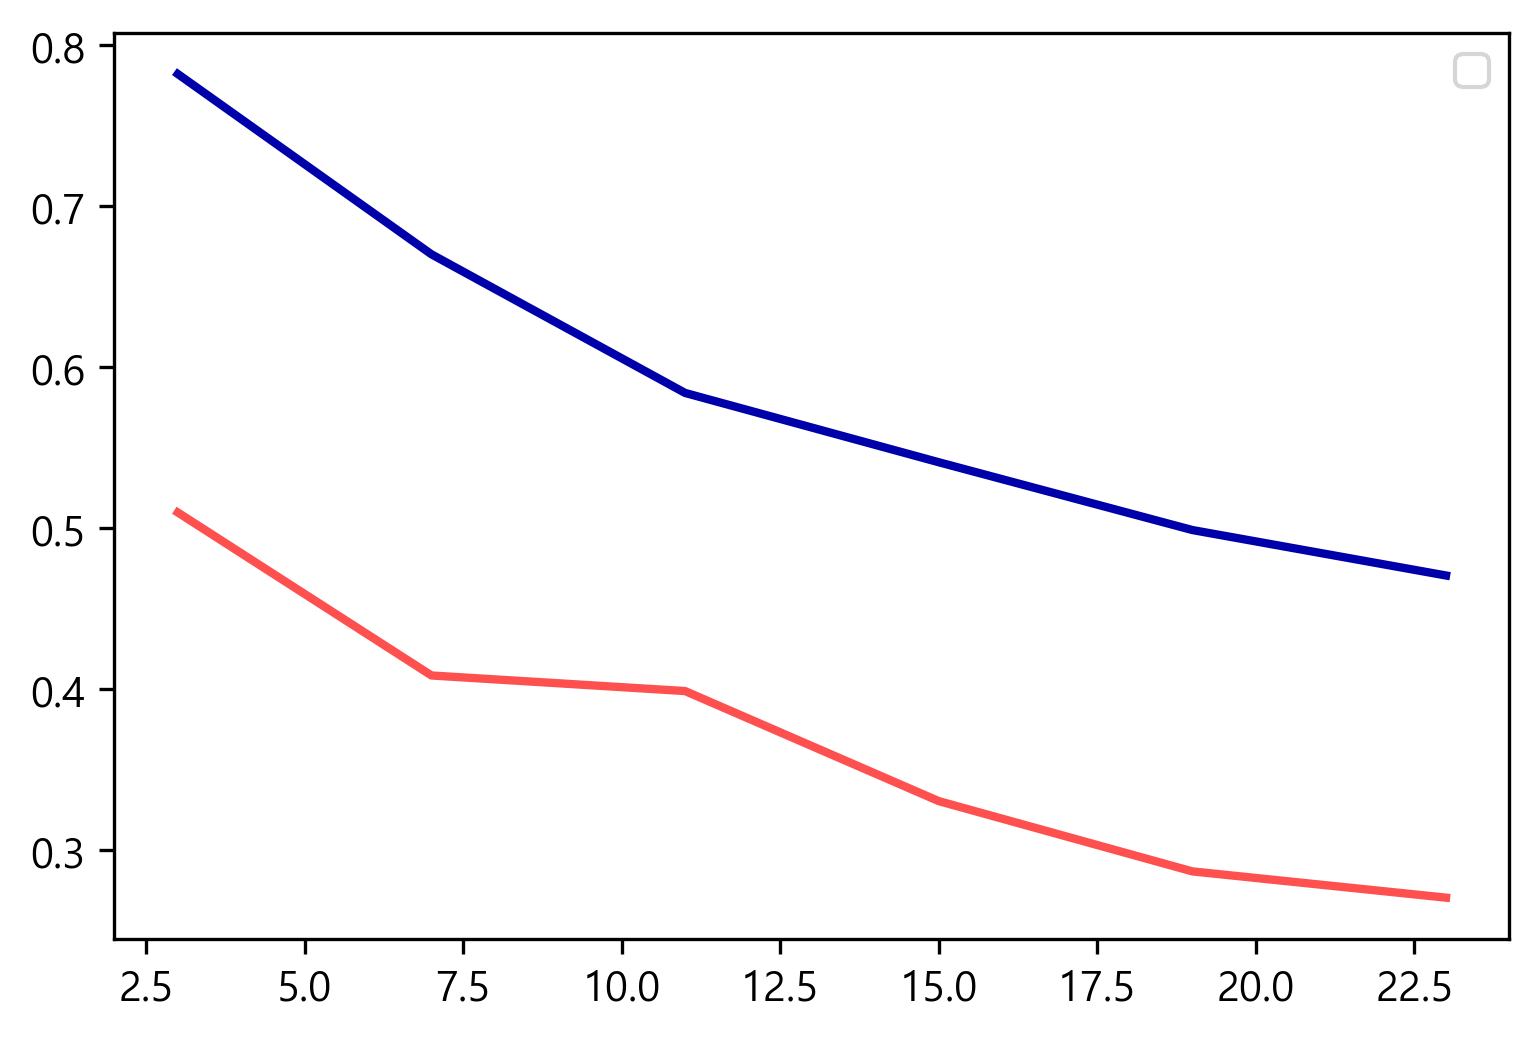

In [152]:

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)
print("X_train.shape:{}".format(X_train.shape))

lr = LinearRegression().fit(X_train, y_train) 
ks = [3,7,11,15,19,23]

score=[]
for i in ks:
    knn = KNeighborsRegressor(n_neighbors=i).fit(X_train, y_train)
    score.append([knn.score(X_train, y_train),knn.score(X_test, y_test)])

score = np.array(score)
# 파랑은 train, 빨강은 test모델
plt.plot(ks, score[:,0])
plt.plot(ks, score[:,1])
plt.legend()


 alpha = 0.01
훈련 세트 점수: 0.94
테스트 세트 점수: 0.70
defult alpha = 1
훈련 점수: 0.89
테스트 점수: 0.75

alpha = 10
훈련 세트 점수: 0.79
테스트 세트 점수: 0.64

 alpha = 100
훈련 세트 점수: 0.60
테스트 세트 점수: 0.42


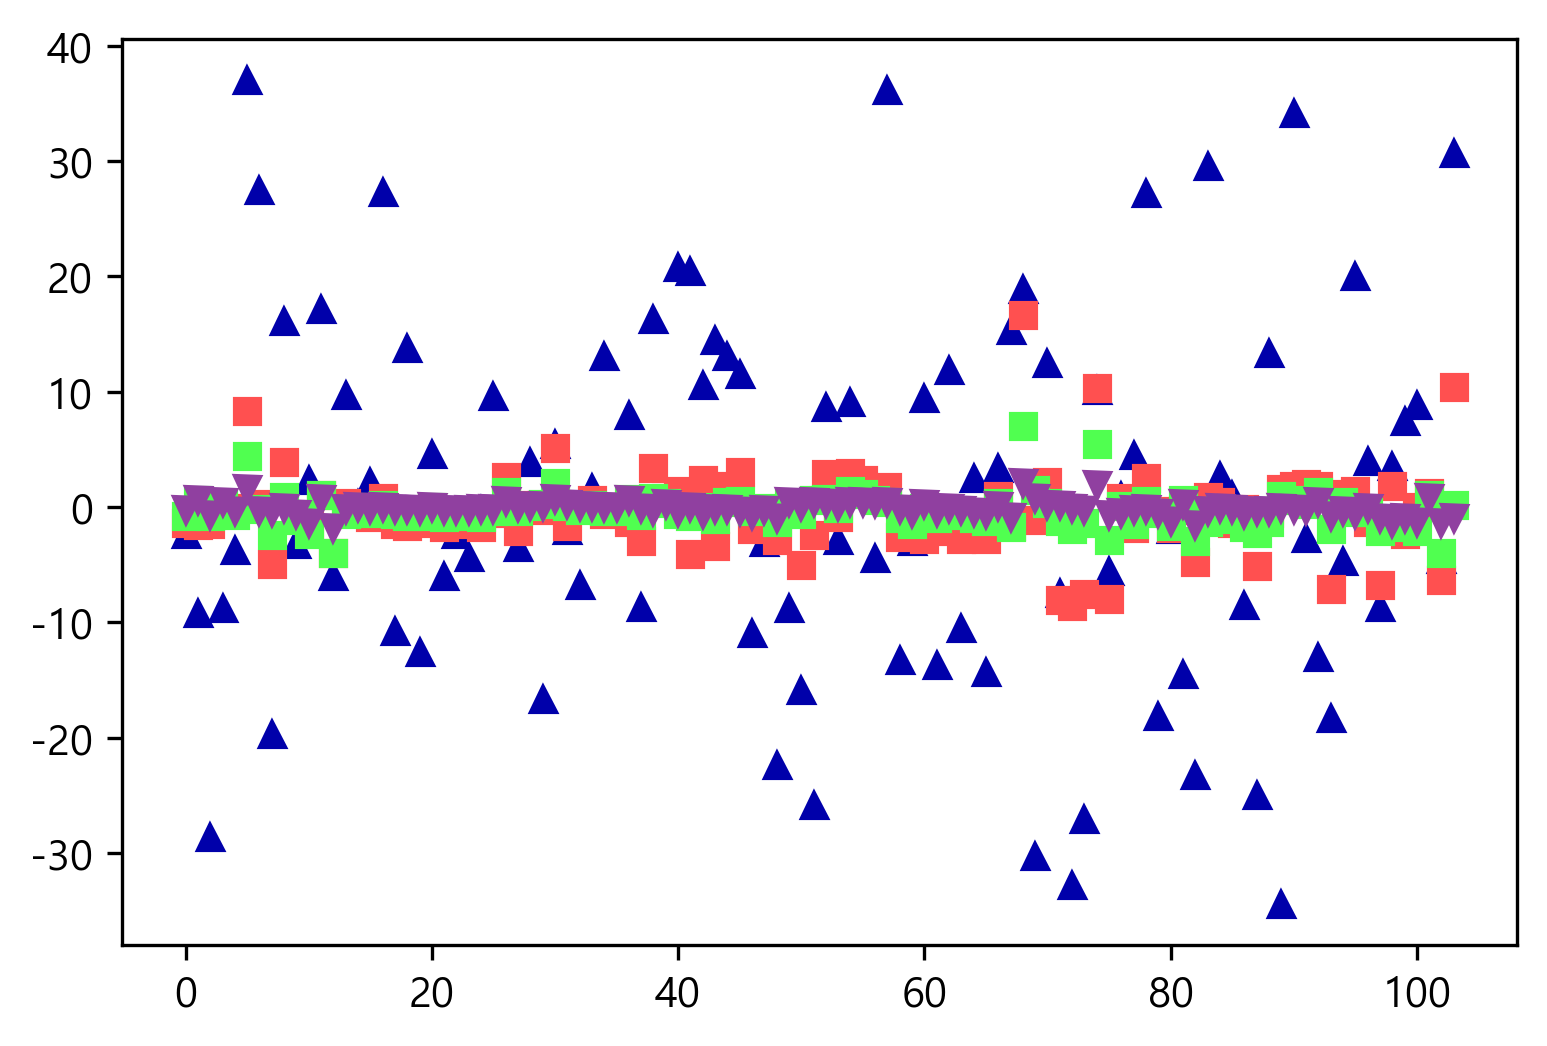

In [45]:
## 릿지 회귀
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.linear_model import Ridge


print("\n alpha = 0.01")
Ridge001 = Ridge(alpha=0.01).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(Ridge001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(Ridge001.score(X_test, y_test)))

Ridege1 = Ridge().fit(X_train,y_train)
print("defult alpha = 1")
print("훈련 점수: {:.2f}".format(Ridege1.score(X_train,y_train)))
print("테스트 점수: {:.2f}".format(Ridege1.score(X_test,y_test)))

Ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("\nalpha = 10")
print("훈련 세트 점수: {:.2f}".format(Ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(Ridge10.score(X_test, y_test)))

print("\n alpha = 100")
Ridge100 = Ridge(alpha=100).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(Ridge100.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(Ridge100.score(X_test, y_test)))

plt.plot(Ridge001.coef_, '^', label="ridge alpha=0.01")
plt.plot(Ridege1.coef_, 's', label="ridge alpha=1")
plt.plot(Ridge10.coef_, 's', label="ridge alpha=10")
plt.plot(Ridge100.coef_, 'v', label="ridge alpha=100")

# 알파가 크면 과소적합 작으면 과대 적합이 된다.
# 알파가 작을수록 테스트 점수가 큰것을 볼 수 있다.




훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4
계수값:
 [-0.     0.    -0.     0.    -0.     0.    -0.     0.    -0.    -0.
 -0.     0.    -5.353 -0.     0.    -0.     0.    -0.    -0.    -0.
 -0.    -0.    -0.    -0.    -0.    -0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.    -0.     0.
 -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.    -0.    -0.
 -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.     0.     0.
  0.    -0.    -0.    -0.     0.    -0.    -0.     0.    -0.    -1.051
 -3.31  -0.    -0.     0.    -0.    -0.    -0.     0.    -0.    -0.414
 -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.
 -0.     0.    -0.    -0.   ]
(array([12, 79, 80, 89], dtype=int64),)

Lisso 001
훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수: 33

Lisso 00001
훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수: 96


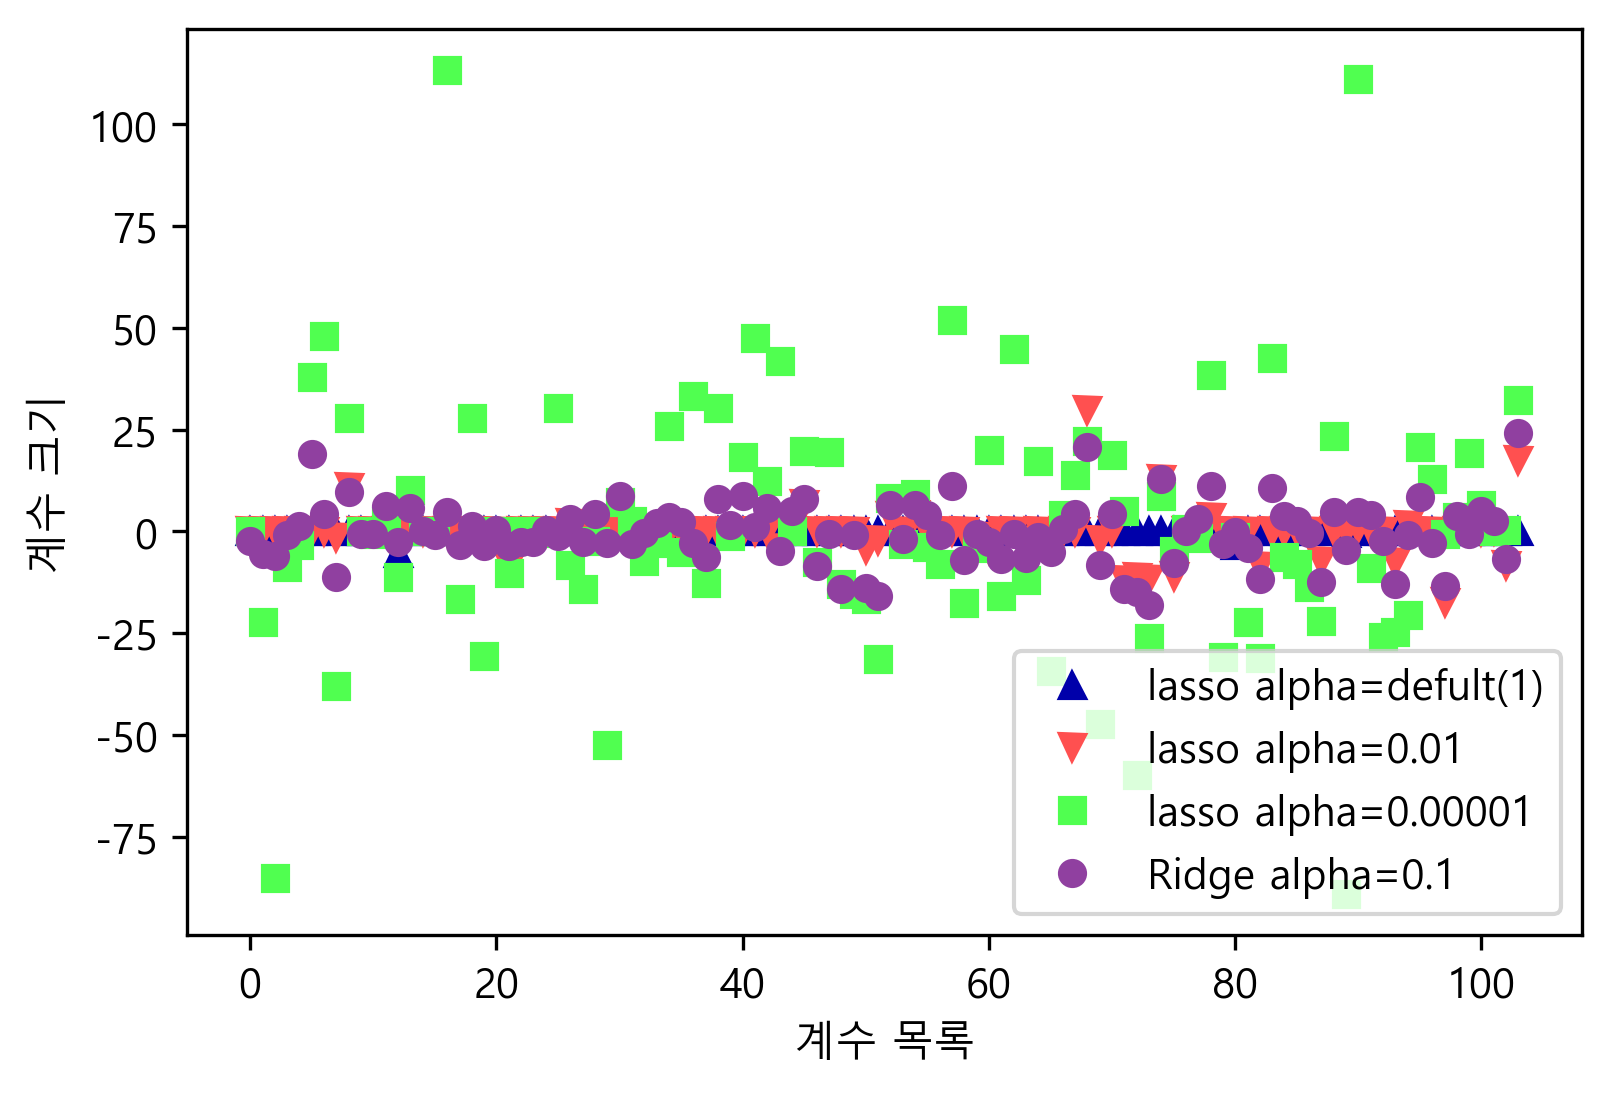

In [56]:
# 라쏘 모뎀

from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso.coef_ !=0)))

print("계수값:\n", lasso.coef_)
print(np.where(lasso.coef_ !=0))

print("\nLisso 001")
lasso001 = Lasso(alpha=0.01,max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso001.coef_ !=0)))


print("\nLisso 00001")
lasso00001 = Lasso(alpha=0.0001,max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso00001.coef_ !=0)))

Ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

plt.plot(lasso.coef_, '^', label="lasso alpha=defult(1)")
plt.plot(lasso001.coef_, 'v', label="lasso alpha=0.01")
plt.plot(lasso00001.coef_, 's', label="lasso alpha=0.00001")
plt.plot(Ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.legend(["lasso alpha=defult(1)", "lasso alpha=0.01", "lasso alpha=0.00001", "Ridge alpha=0.1"], loc=4)

# alpha를 아주 작게 하면 선형 모델과 유사함을 알 수 있음

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']
타깃의 이름: ['setosa' 'versicolor' 'virginica']
특성의 이름: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
x.shape:(150, 1)
y.shape:(150,)


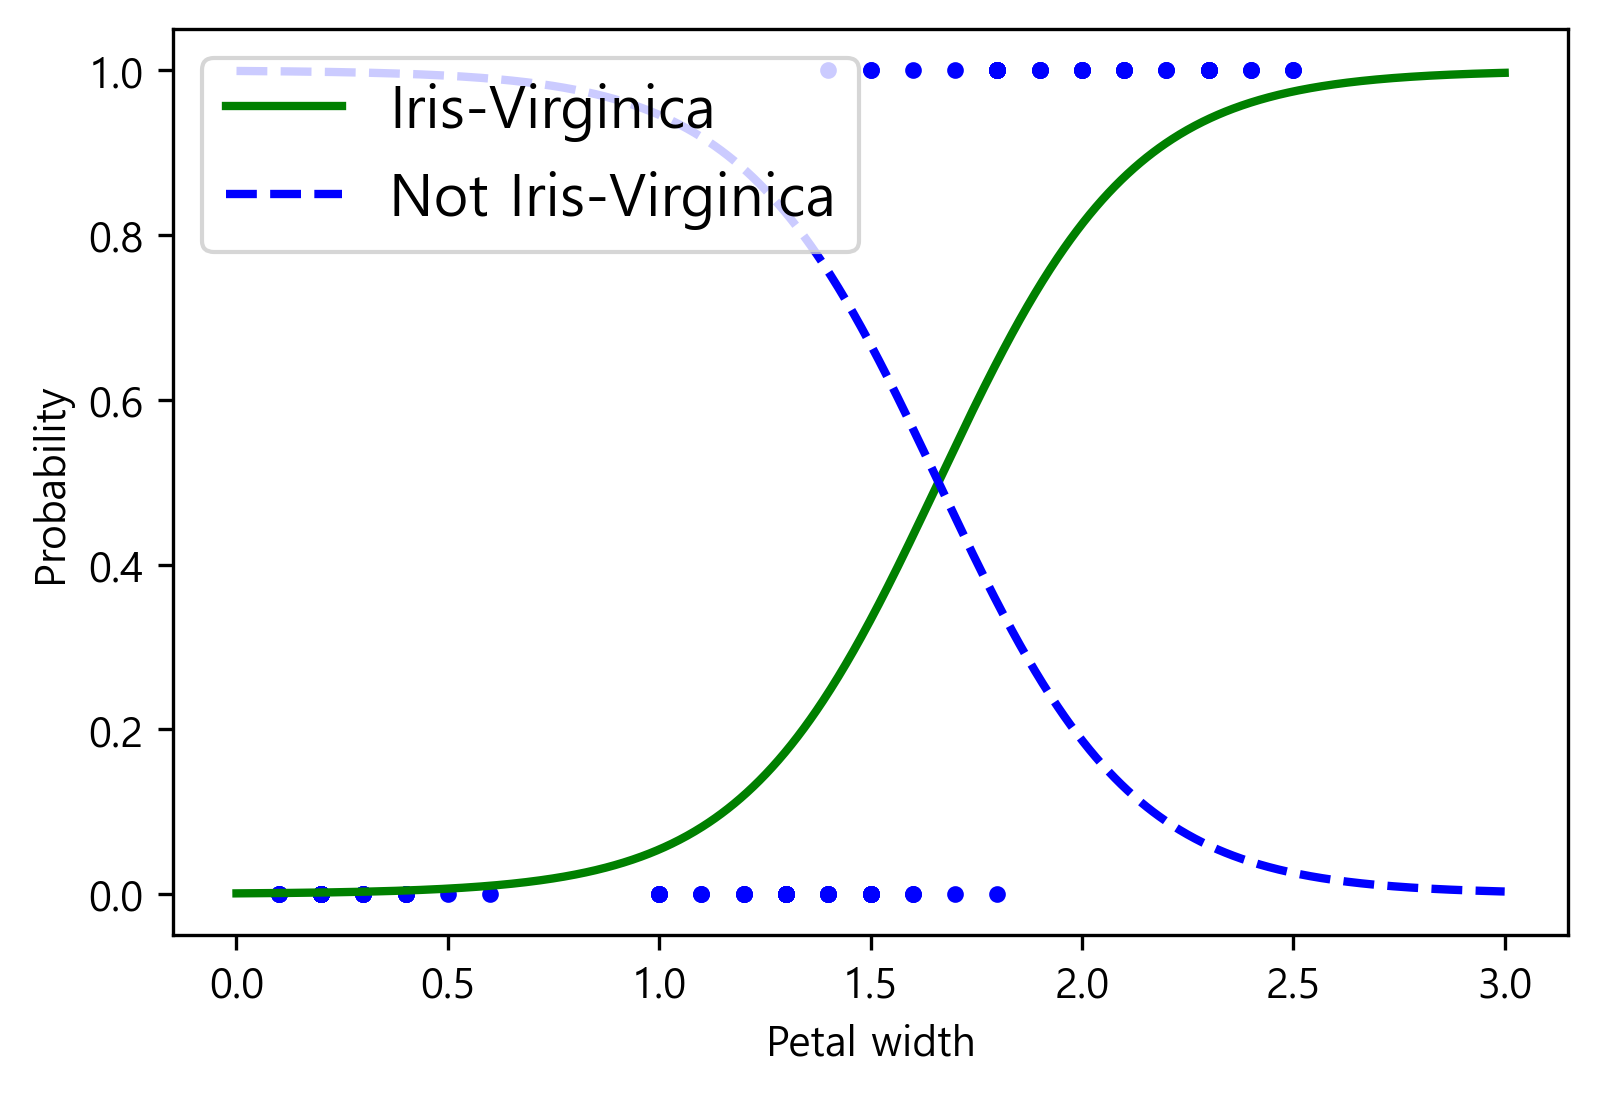

1.3 , 1.5, 1.7, 2.0 = [0 0 1 1]


In [69]:
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

iris = datasets.load_iris()
print(list(iris.keys()))
print("타깃의 이름: {}".format(iris['target_names']))
print("특성의 이름: {}".format(iris['feature_names']))
  # petal width
X = iris["data"][:,3:]
print("x.shape:{}".format(X.shape))
# virginica 면 1 아님 0
y = (iris["target"]==2).astype(np.int)  
print("y.shape:{}".format(y.shape))

log_reg = LogisticRegression()
log_reg.fit(X,y)

# 꽃잎 너비가 0~3cm인 꽃에 대해 모델의 추정 확률
X_new = np.linspace(0,3,1000).reshape(1000,1).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X,y,"b.")
plt.plot(X_new, y_proba[:,1], "g-", label="Iris-Virginica" )
plt.plot(X_new, y_proba[:,0], "b--", label="Not Iris-Virginica" )

plt.xlabel("Petal width")
plt.ylabel("Probability")
plt.legend(loc= "upper left",fontsize = 14)
plt.show()


print("1.3 , 1.5, 1.7, 2.0 = {}".format(log_reg.predict([[1.3],[1.5],[1.7],[2.0]])))

C:\Users\JS\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


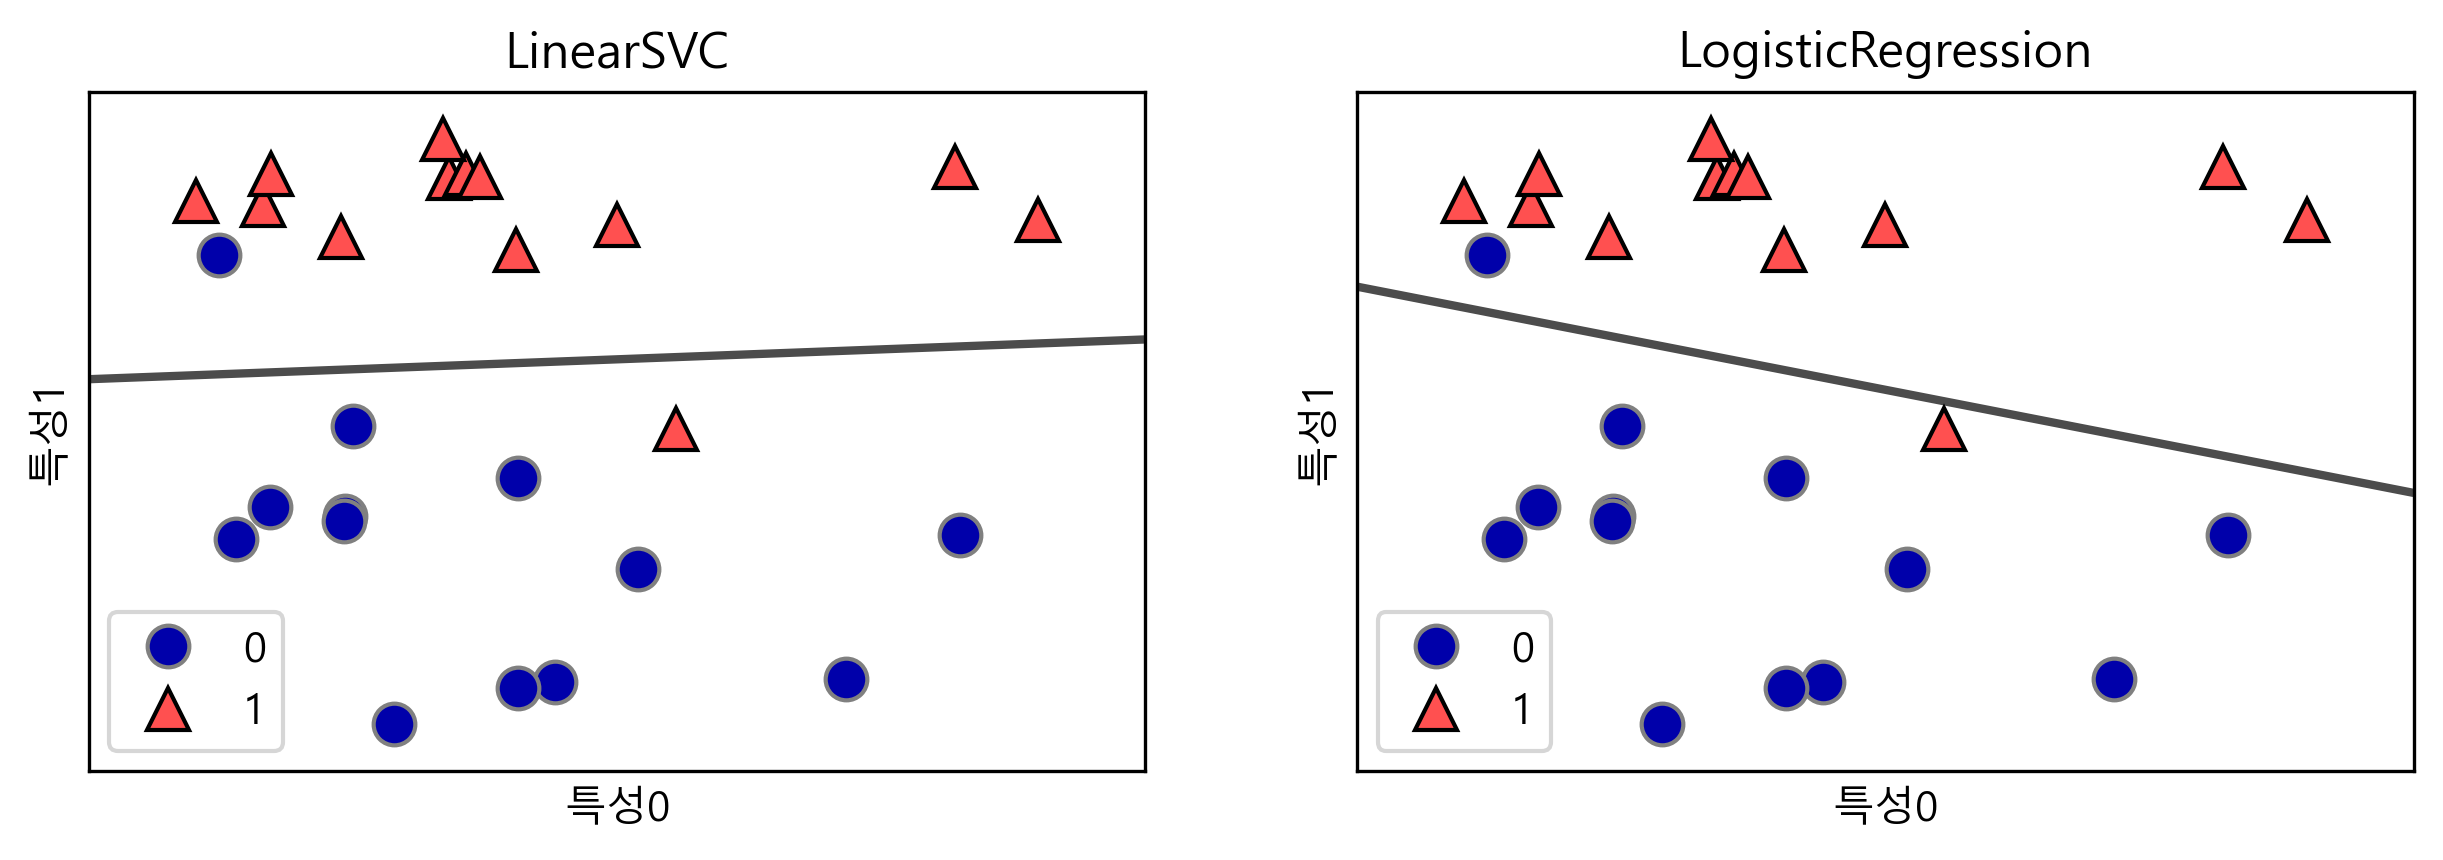

In [72]:
from sklearn.svm import LinearSVC

X,y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1,2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf =model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성0")
    ax.set_ylabel("특성1")
    ax.legend()

In [76]:

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test  = train_test_split(cancer.data, cancer.target,
                                                    stratify=cancer.target, random_state=42)
print("\ndefult")
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg.score(X_test, y_test)))

print("\n100")
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg100.score(X_test, y_test)))

print("\n0.01")
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg001.score(X_test, y_test)))


defult
훈련 세트 점수 : 0.958
테스트 세트 점수 : 0.958

100
훈련 세트 점수 : 0.984
테스트 세트 점수 : 0.965

0.01
훈련 세트 점수 : 0.953
테스트 세트 점수 : 0.951


C=0.001 훈련 정확도 : 0.91
C=0.001 테스트 정확도 : 0.92
사용한 특성 3
C=1.000 훈련 정확도 : 0.96
C=1.000 테스트 정확도 : 0.96
사용한 특성 10
C=100.000 훈련 정확도 : 0.99
C=100.000 테스트 정확도 : 0.98
사용한 특성 23


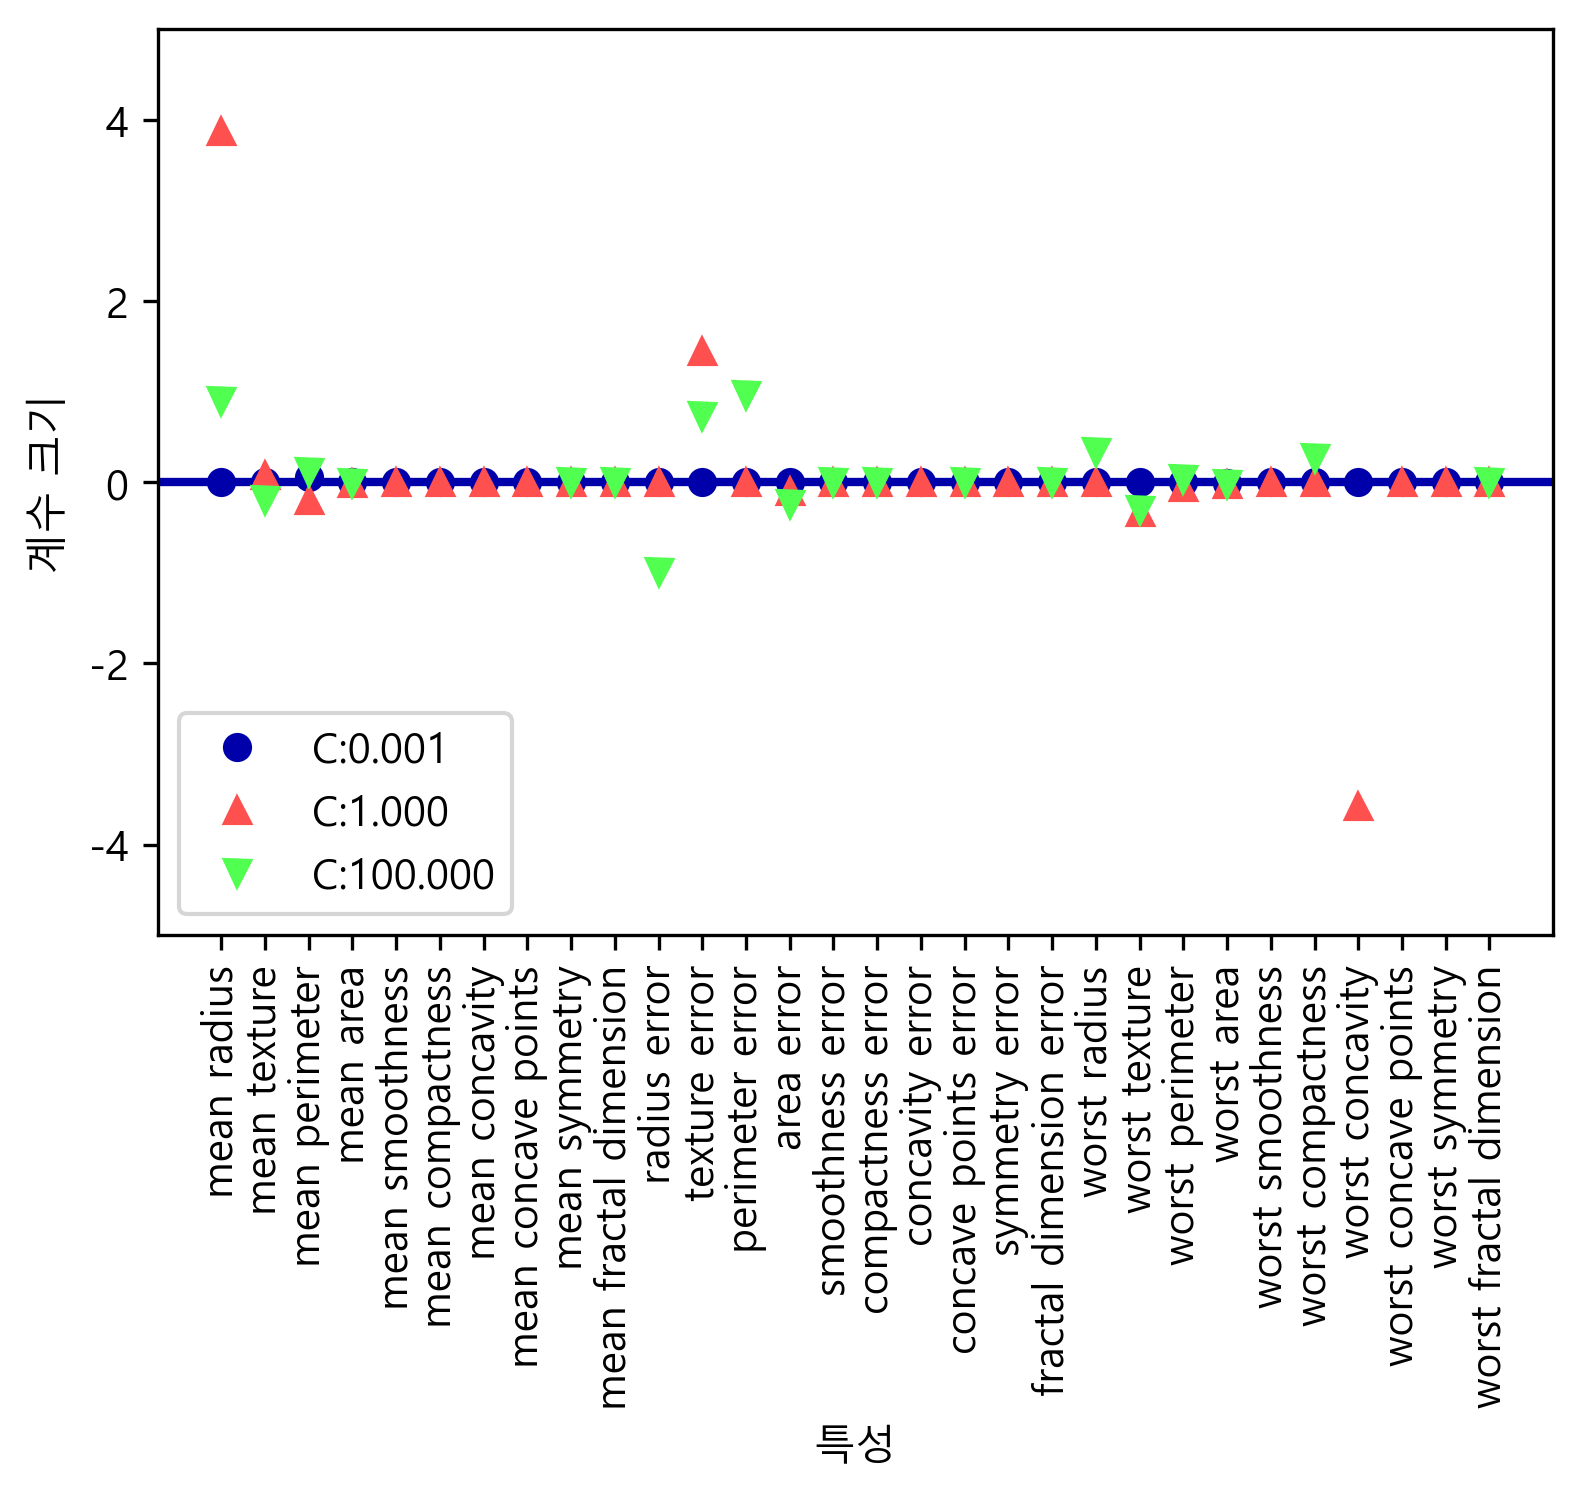

In [82]:
# L2
for C, marker in zip([0.001,1,100], ['o', '^', 'v']):
    lr = LogisticRegression(solver='liblinear', C=C, penalty = "l1", max_iter=1000)
    lr.fit(X_train, y_train)
    print("C={:.3f} 훈련 정확도 : {:.2f}".format(C, lr.score(X_train, y_train)))
    print("C={:.3f} 테스트 정확도 : {:.2f}".format(C, lr.score(X_test, y_test)))
    print("사용한 특성", np.sum(lr.coef_!=0))
    plt.plot(lr.coef_.T, marker, label="C:{:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlimes = plt.xlim()
plt.hlines(0,xlimes[0], xlimes[1])
plt.xlim(xlimes)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.ylim(-5,5)
plt.legend(loc=3)



C=0.001 훈련 정확도 : 0.92
C=0.001 테스트 정확도 : 0.94
사용한 특성 30
C=1.000 훈련 정확도 : 0.96
C=1.000 테스트 정확도 : 0.96
사용한 특성 30
C=100.000 훈련 정확도 : 0.97
C=100.000 테스트 정확도 : 0.97
사용한 특성 30


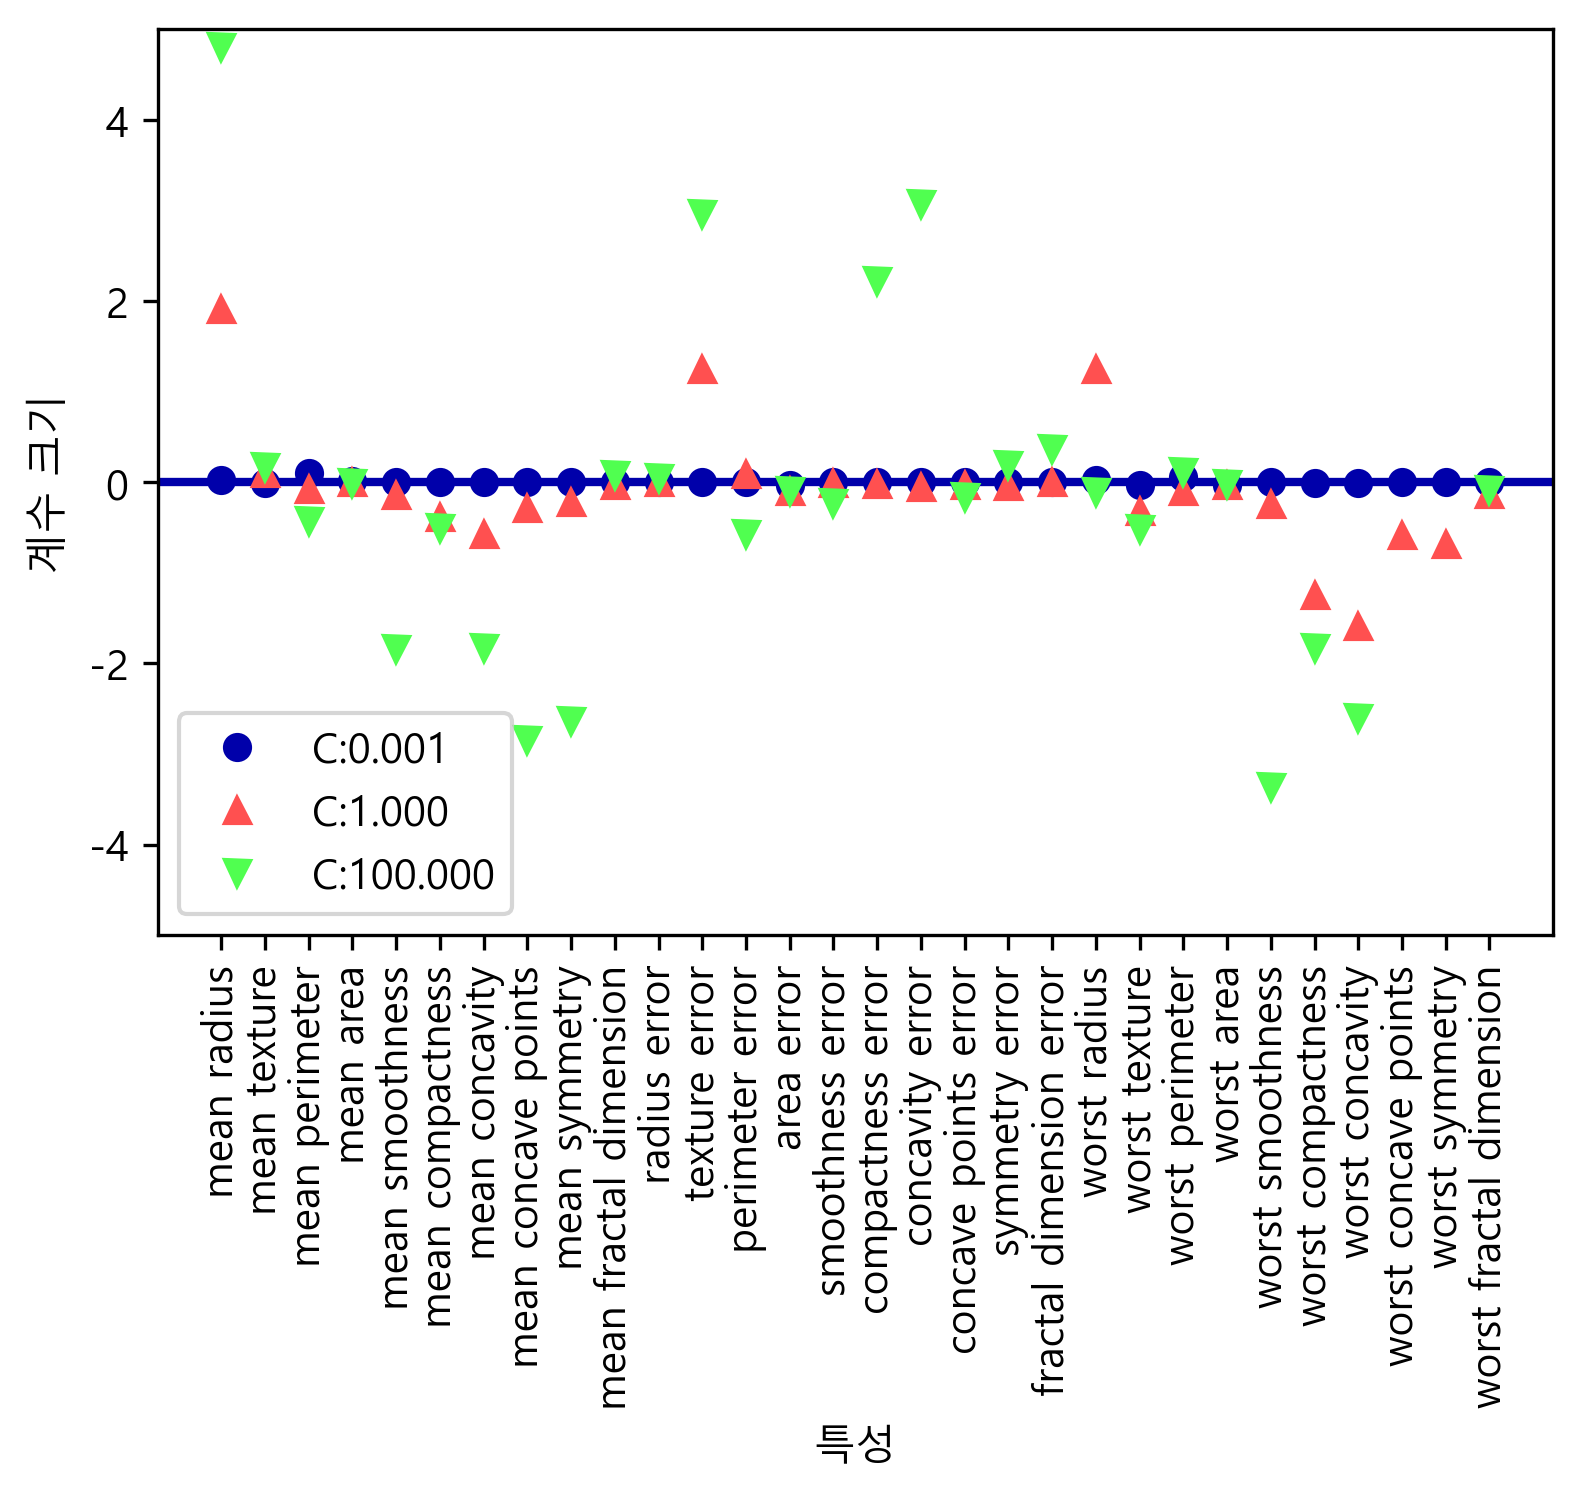

In [84]:
# L2
for C, marker in zip([0.001,1,100], ['o', '^', 'v']):
    lr = LogisticRegression(solver='liblinear', C=C, penalty = "l2", max_iter=1000)
    lr.fit(X_train, y_train)
    print("C={:.3f} 훈련 정확도 : {:.2f}".format(C, lr.score(X_train, y_train)))
    print("C={:.3f} 테스트 정확도 : {:.2f}".format(C, lr.score(X_test, y_test)))
    print("사용한 특성", np.sum(lr.coef_!=0))
    plt.plot(lr.coef_.T, marker, label="C:{:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlimes = plt.xlim()
plt.hlines(0,xlimes[0], xlimes[1])
plt.xlim(xlimes)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.ylim(-5,5)
plt.legend(loc=3)